# Non-local means denoising for preserving textures

In this example, we denoise a detail of the astronaut image using the __non-local
means__ filter. The algorithm replaces the value of a pixel by an average of a selection of other pixels values: small patches centered on the
other pixels are compared to the patch centered on the pixel of interest, and the average is performed only for pixels that have patches close to the current patch. As a result, this algorithm can restore well textures, that would be blurred by other denoising algorithm.

When __fast_mode__ is ``False``, a spatial Gaussian weighting is applied to the patches when computing patch distances.  When __fast_mode__ is
``True`` a faster algorithm employing uniform spatial weighting on the patches is applied.

For either of these cases, if the noise standard deviation, __sigma__, is provided, the expected noise variance is subtracted out when computing patch
distances.  This can lead to a modest improvement in image quality.

__estimate_sigma__ can provide a good starting point for setting the __h__ (and optionally, __sigma__) parameters for the non-local means algorithm.
__h__ is a constant that controls the decay in patch weights as a function of the distance between patches.  Larger __h__ allows more smoothing between disimilar patches. In this demo __h__ was hand-tuned to give the approximate best-case performance of each variant.

estimated noise standard deviation = 0.07711146447384844
PSNR (noisy) = 22.19
PSNR (slow) = 29.43
PSNR (slow, using sigma) = 29.78
PSNR (fast) = 29.01
PSNR (fast, using sigma) = 29.41


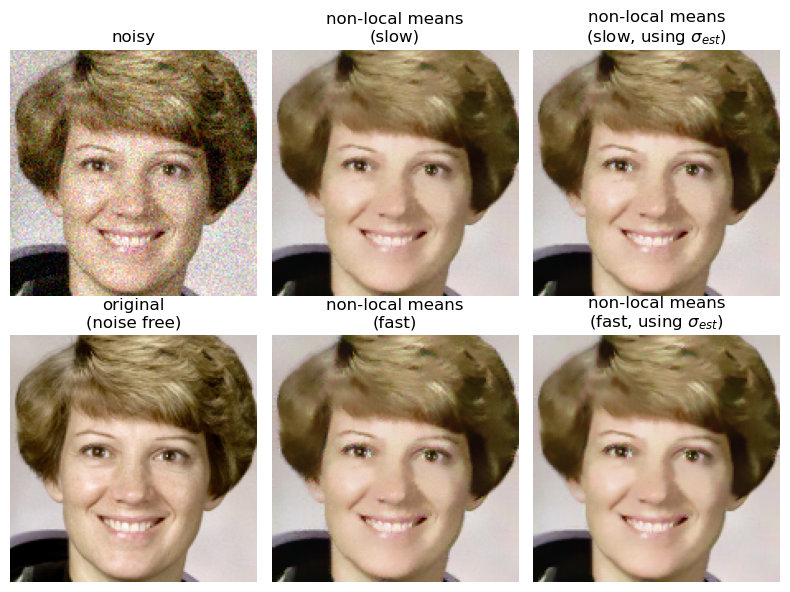

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, img_as_float
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage.metrics import peak_signal_noise_ratio
from skimage.util import random_noise


astro = img_as_float(data.astronaut())
astro = astro[30:180, 150:300]

sigma = 0.08
noisy = random_noise(astro, var=sigma**2)

# estimate the noise standard deviation from the noisy image
sigma_est = np.mean(estimate_sigma(noisy, channel_axis=-1))
print(f'estimated noise standard deviation = {sigma_est}')

patch_kw = dict(patch_size=5,      # 5x5 patches
                patch_distance=6,  # 13x13 search area
                channel_axis=-1)

# slow algorithm
denoise = denoise_nl_means(noisy, h=1.15 * sigma_est, fast_mode=False,
                           **patch_kw)

# slow algorithm, sigma provided
denoise2 = denoise_nl_means(noisy, h=0.8 * sigma_est, sigma=sigma_est,
                            fast_mode=False, **patch_kw)

# fast algorithm
denoise_fast = denoise_nl_means(noisy, h=0.8 * sigma_est, fast_mode=True,
                                **patch_kw)

# fast algorithm, sigma provided
denoise2_fast = denoise_nl_means(noisy, h=0.6 * sigma_est, sigma=sigma_est,
                                 fast_mode=True, **patch_kw)

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(8, 6),
                       sharex=True, sharey=True)

ax[0, 0].imshow(noisy)
ax[0, 0].axis('off')
ax[0, 0].set_title('noisy')
ax[0, 1].imshow(denoise)
ax[0, 1].axis('off')
ax[0, 1].set_title('non-local means\n(slow)')
ax[0, 2].imshow(denoise2)
ax[0, 2].axis('off')
ax[0, 2].set_title('non-local means\n(slow, using $\\sigma_{est}$)')
ax[1, 0].imshow(astro)
ax[1, 0].axis('off')
ax[1, 0].set_title('original\n(noise free)')
ax[1, 1].imshow(denoise_fast)
ax[1, 1].axis('off')
ax[1, 1].set_title('non-local means\n(fast)')
ax[1, 2].imshow(denoise2_fast)
ax[1, 2].axis('off')
ax[1, 2].set_title('non-local means\n(fast, using $\\sigma_{est}$)')

fig.tight_layout()

# print PSNR metric for each case
psnr_noisy = peak_signal_noise_ratio(astro, noisy)
psnr = peak_signal_noise_ratio(astro, denoise)
psnr2 = peak_signal_noise_ratio(astro, denoise2)
psnr_fast = peak_signal_noise_ratio(astro, denoise_fast)
psnr2_fast = peak_signal_noise_ratio(astro, denoise2_fast)

print(f'PSNR (noisy) = {psnr_noisy:0.2f}')
print(f'PSNR (slow) = {psnr:0.2f}')
print(f'PSNR (slow, using sigma) = {psnr2:0.2f}')
print(f'PSNR (fast) = {psnr_fast:0.2f}')
print(f'PSNR (fast, using sigma) = {psnr2_fast:0.2f}')

plt.show()